<a href="https://colab.research.google.com/github/JesusRiveroOrtega/heartsounds_segmentation_forecasting/blob/master/hsmmlabels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from scipy.io import wavfile as wf
import numpy as np
import random
from matplotlib import pyplot as plt
import csv
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!cd 'drive/My Drive/HSMMbased' && ls

assigned_states.csv  signal.csv


In [0]:
phonocardiogram_signal_file = open('drive/My Drive/HSMMbased/signal.csv', "r")
phonocardiogram_signal = []
labeled_states_file = open('drive/My Drive/HSMMbased/assigned_states.csv', "r")
labeled_states = []

In [0]:
row_counter = 0
phonocardiogram_signal_row_replace = []
for phonocardiogram_signal_row in phonocardiogram_signal_file:
  if row_counter > 0:
    phonocardiogram_signal_row_splited = phonocardiogram_signal_row.split(',')
    phonocardiogram_signal_row_replace = []
    for i in range(0, len(phonocardiogram_signal_row_splited)):
      if phonocardiogram_signal_row_splited[i] == '' or phonocardiogram_signal_row_splited[i] == '\n':
        #phonocardiogram_signal_row_replace.append('0')
        pass
      else:
        phonocardiogram_signal_row_replace.append(phonocardiogram_signal_row_splited[i])
          
    
    phonocardiogram_signal_row_array = np.array(phonocardiogram_signal_row_replace).astype(np.float32)
    phonocardiogram_signal.append(phonocardiogram_signal_row_array)
    
  row_counter += 1


In [0]:
row_counter = 0
labeled_states_row_replace = []
for labeled_states_row in labeled_states_file:
  if row_counter > 0:
    labeled_states_row_splited = labeled_states_row.split(',')
    labeled_states_row_replace = []
    for i in range(0, len(labeled_states_row_splited)):
      if labeled_states_row_splited[i] == '' or labeled_states_row_splited[i] == '\n':
        #labeled_states_row_replace.append('0')
        pass
      else:
        labeled_states_row_replace.append(labeled_states_row_splited[i])
          
    
    labeled_states_row_array = np.array(labeled_states_row_replace).astype(np.float32)
    labeled_states.append(labeled_states_row_array)
    
  row_counter += 1

In [0]:
phonocardiogram_signal_flat = np.array([])
for phonocardiogram_signal_row in phonocardiogram_signal:
  phonocardiogram_signal_flat = np.hstack((phonocardiogram_signal_flat, phonocardiogram_signal_row))
  
labeled_states_flat = np.array([])
for labeled_states_row in labeled_states:
  labeled_states_flat = np.hstack((labeled_states_flat, labeled_states_row))
  
phonocardiogram_signal_flat_train = phonocardiogram_signal_flat[0: int(phonocardiogram_signal_flat.shape[0]*0.0008)]
phonocardiogram_signal_flat_test = phonocardiogram_signal_flat[int(phonocardiogram_signal_flat.shape[0]*0.0008):int(labeled_states_flat.shape[0]*0.001)]
labeled_states_flat_train = labeled_states_flat[0: int(labeled_states_flat.shape[0]*0.0008)]
labeled_states_flat_test = labeled_states_flat[int(labeled_states_flat.shape[0]*0.0008):int(labeled_states_flat.shape[0]*0.001)]

In [16]:
print()

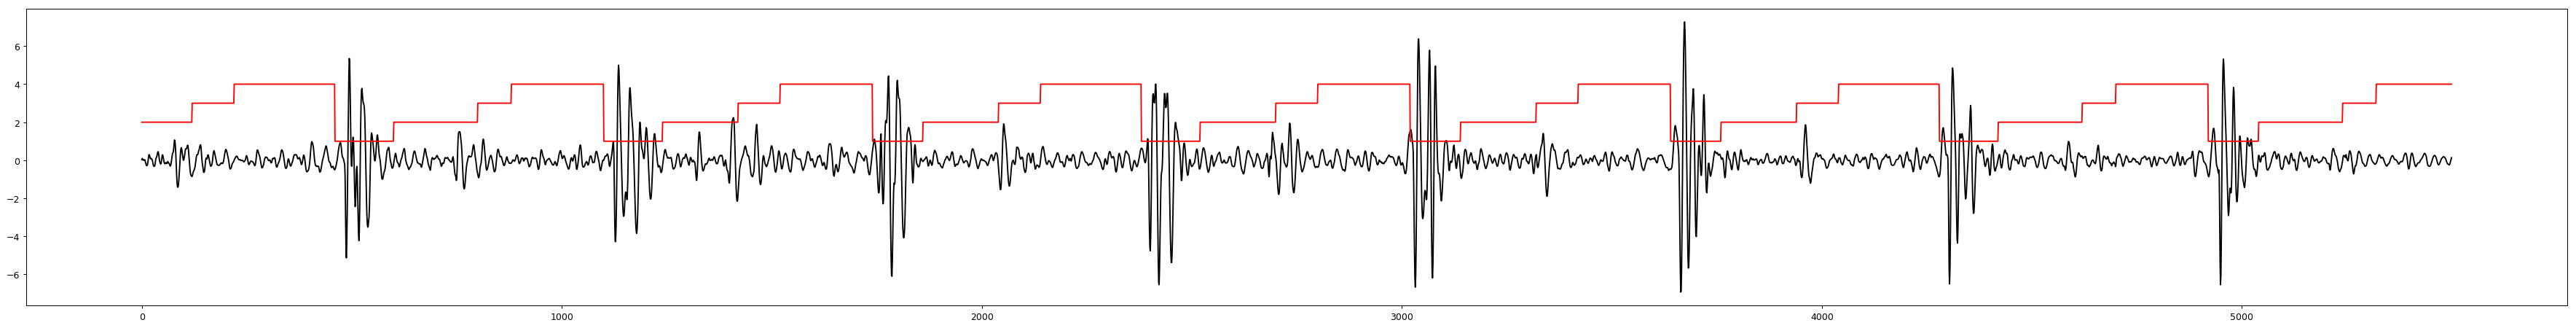

In [17]:
plt.figure(num=1, figsize=(50, 6), dpi=90, facecolor='w', edgecolor='k')
plt.plot(np.transpose(phonocardiogram_signal[1]), 'k')
plt.plot(labeled_states[1], 'r')
plt.show()

In [22]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
 
# split a univariate sequence into samples
def split_sequence(signal, targets, n_steps):
	X, y = list(), list()
	for i in range(len(signal)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(signal)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = signal[i:end_ix], targets[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(phonocardiogram_signal_flat_train, labeled_states_flat_train, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input_k, y_out = split_sequence(phonocardiogram_signal_flat_test, labeled_states_flat_test, n_steps)
x_input = x_input_k.reshape((x_input_k.shape[0], n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: ignored

In [23]:
print(X.shape)

(4960, 2, 1, 2, 1)
